# Credit Card Fraud Detection - Classification

### Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

print(f"Pandas Version : Pandas {pd.__version__}") #print("Pandas Version : Pandas {}" ,pd.__version__ )
print(f"Numpy Version : Numpy {np.__version__}")
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn Version : Seaborn {sns.__version__}")
%matplotlib inline

Pandas Version : Pandas 1.0.5
Numpy Version : Numpy 1.18.5
Matplotlib Version : Matplotlib 3.2.2
Seaborn Version : Seaborn 0.10.1


### Importing Dataset into the Dataframe

In [2]:
CreditData = pd.read_csv('creditcard.csv')

In [3]:
CreditData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Descriptive Analytics

In [4]:
CreditData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
CreditData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for Missing Values

In [6]:
CreditData.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 * There are no missing value in any of the columns

### Checking for Imbalance in the Data

In [7]:
CreditData['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

* There is a class imbalance in the data based on the value counts proportion

### Outlier Detection 

In [8]:
Total_Length_Class_One = len(CreditData[CreditData['Class'] == 1]) # Length of class 1
Total_Length_Class_One

492

In [9]:
Total_Length_Class_Zero = len(CreditData[CreditData['Class'] == 0]) # Length of class 0
Total_Length_Class_Zero

284315

In [10]:
len(CreditData)  #Total length

284807

* Creation of a function to return index of outliers 

In [11]:
 def indicies_of_outliers(x): 
    q1, q3 = np.percentile(x, [25, 75]) 
    iqr = q3 - q1 
    lower_bound = q1 - (iqr * 1.5) 
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound)) 

In [12]:
Outliers_Length_Class_One  = len(indicies_of_outliers(CreditData[CreditData['Class'] == 1]['Amount'])[0]) #Outlies length in class 1
Outliers_Length_Class_One

69

In [13]:
Outliers_Length_Class_Zero  = len(indicies_of_outliers(CreditData[CreditData['Class'] == 0]['Amount'])[0]) #Outlies length in class 0
Outliers_Length_Class_Zero

31862

### Proportion of Outliers from total length of each classes

* Class 0 Class 1

In [14]:
Class_0 = Outliers_Length_Class_Zero / Total_Length_Class_Zero
Class_0

0.11206584246346482

In [15]:
Class_1= Outliers_Length_Class_One / Total_Length_Class_One
Class_1

0.1402439024390244

### Box Plots for Class and Amount

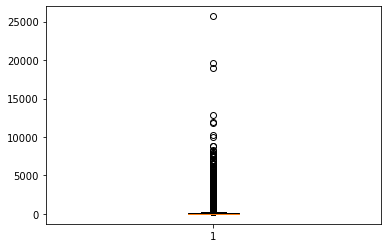

In [16]:
plt.boxplot(CreditData[CreditData['Class']== 0]['Amount'])
plt.show()

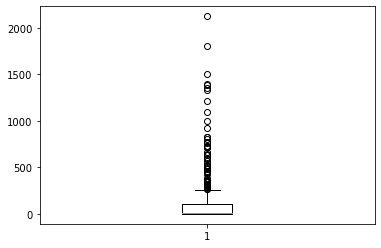

In [17]:
plt.boxplot(CreditData[CreditData['Class']== 1]['Amount'])
plt.show()

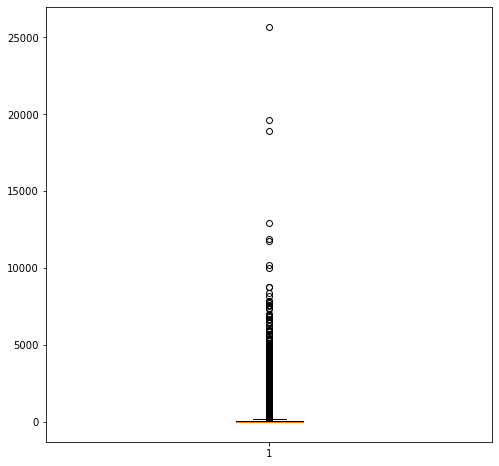

In [18]:
plt.figure(figsize = (8,8))
plt.boxplot(CreditData['Amount'])
plt.show()

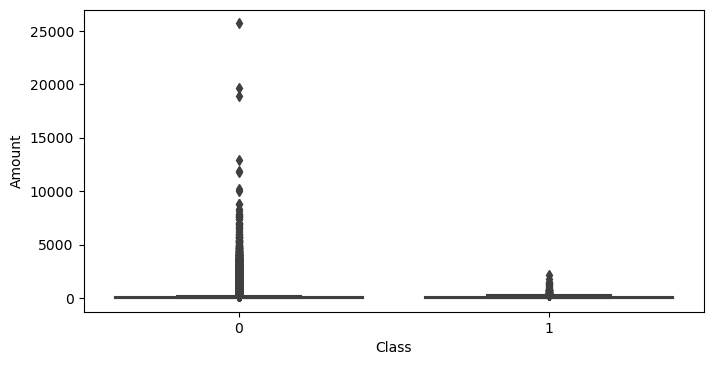

In [19]:
plt.figure(figsize = (8,4) , dpi = 100)
sns.boxplot(x ="Class",y="Amount",
                 data=CreditData)
plt.show()

### Quartile Ranges, Upper Limit and Lower Limit

In [20]:
q1,q3 = np.percentile(CreditData['Amount'], [25, 75])

In [21]:
iqr = q3 - q1

In [22]:
Upper_Limit = iqr + (q3 * 1.5)
Lower_Limit = iqr - (q1 * 1.5)
print(Upper_Limit)
print(Lower_Limit)

187.3125
63.165


### Outlier Removal Check 

In [23]:
def outlier_removal(max_val):
    print("Values Lost on the basis of MAX based Removal : {}".format(len(CreditData[(CreditData['Class']==0) &(CreditData['Amount']>max_val)])))
    
    print("Proportion of Data Lost : {}".format(len(CreditData[(CreditData['Class']==0) &(CreditData['Amount']>max_val)])/len(CreditData)))
    
    temp_df = CreditData[CreditData['Amount']<max_val]  
    print(temp_df['Class'].value_counts(normalize = True))

In [24]:
outlier_removal(8000)

Values Lost on the basis of MAX based Removal : 12
Proportion of Data Lost : 4.213379586878132e-05
0    0.998272
1    0.001728
Name: Class, dtype: float64


### Outlier Handling

* Interquartile range proportion for outliers

In [25]:
len(CreditData[(CreditData['Amount']<=q3 + 1.5*iqr)&(CreditData['Amount']>=q1 - 1.5*iqr)])/len(CreditData)

0.8879802813835335

In [26]:
CreditData['Amount'] = np.where(CreditData['Amount'] > 8000, 8000, CreditData['Amount']) 

In [27]:
CreditData['Amount'].describe()

count    284807.000000
mean         88.141844
std         238.859724
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max        8000.000000
Name: Amount, dtype: float64

### Length of the Dataset

In [28]:
print(f"Rows : {CreditData.shape[0]}") 
print(f"Columns : {CreditData.shape[1]}")

Rows : 284807
Columns : 31


### Droping Duplicate Values 

In [29]:
len(CreditData.drop_duplicates())/len(CreditData)

0.996204447222154

In [30]:
print(len(CreditData.drop_duplicates())) 
print(len(CreditData[CreditData.duplicated()]))  

283726
1081


In [31]:
CreditData = CreditData.drop_duplicates()

In [32]:
CreditData.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Visualization 

* 1. Scatter Plot - Amount Vs Time in Seconds

In [33]:
import warnings
warnings.filterwarnings('ignore')

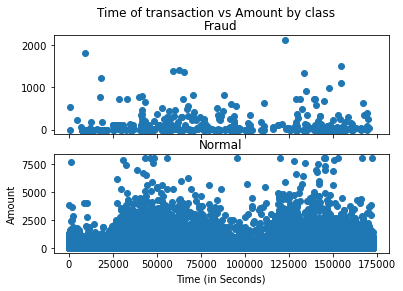

In [34]:
Fraud = CreditData[CreditData['Class']==1] 
Normal = CreditData[CreditData['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Time of transaction vs Amount by class') 
ax1.scatter(Fraud.Time, Fraud.Amount) 
ax1.set_title('Fraud') 
ax2.scatter(Normal.Time, Normal.Amount) 
ax2.set_title('Normal') 
plt.xlabel('Time (in Seconds)') 
plt.ylabel('Amount') 
plt.show()

* 2. Distribution Of Transcation Based On Hours - Class Vs Time in Hours

##### Handling Time Column

In [35]:
CreditData['Hour'] = CreditData['Time']/(60*60)%24   # 2 days of data
import math
CreditData['Hour'] = CreditData['Hour'].apply(lambda x : math.floor(x))
CreditData.reset_index(drop = True, inplace = True)
CreditData['Hour'].describe()

count    283726.000000
mean         14.045646
std           5.834817
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64

In [36]:
CreditData['Hour'] = CreditData['Hour'].astype(int)+1
CreditData['Hour'].describe()

count    283726.000000
mean         15.045646
std           5.834817
min           1.000000
25%          11.000000
50%          16.000000
75%          20.000000
max          24.000000
Name: Hour, dtype: float64

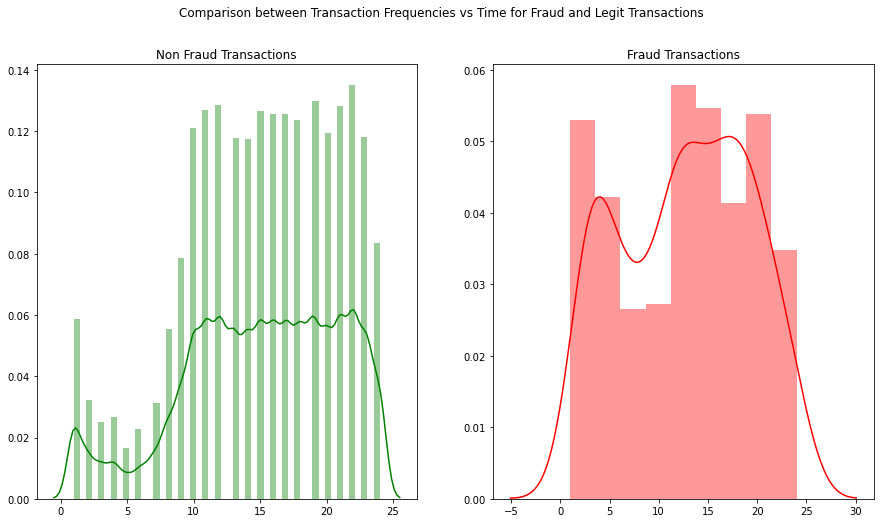

In [37]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(CreditData[CreditData['Class']==0]['Hour'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Non Fraud Transactions')

sns.distplot(CreditData[CreditData['Class']==1]['Hour'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Legit Transactions')
plt.show()



* Comparison On Same Plot - Class Vs Time in Hours

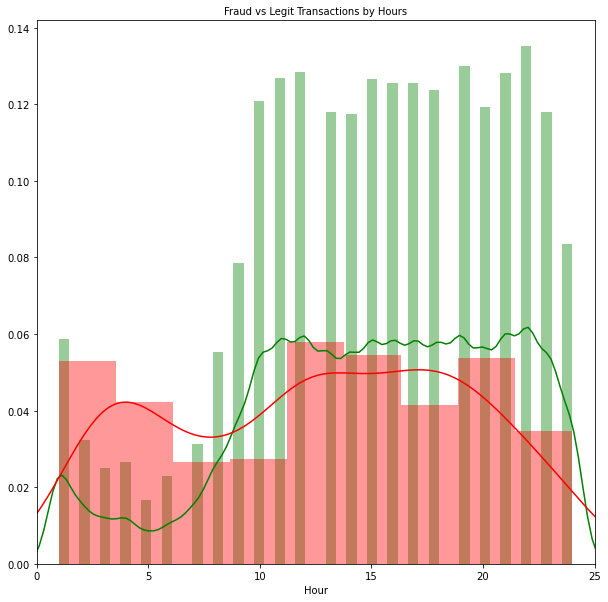

In [38]:
plt.figure(figsize=(10,10))

sns.distplot(CreditData[CreditData['Class'] == 0]["Hour"], color='g') # Genuine - green

sns.distplot(CreditData[CreditData['Class'] == 1]["Hour"], color='r') # Fraudulent - Red

plt.title('Fraud vs Legit Transactions by Hours', fontsize=10)
plt.xlim([0,25])
plt.show()

* Observing patterns in No of Legit Transactions & Fraud Transactions vs Time (Hour) to observe more

In [39]:
Legit_Hour_Count = CreditData[CreditData['Class']==0].groupby(['Hour'] , as_index = False)['Hour'].size().reset_index(name = 'Count')
Legit_Hour_Count

,Hour,Count
0,1,7641
1,2,4198
2,3,3260
3,4,3470
4,5,2181
5,6,2977
6,7,4073
7,8,7210
8,9,10223
9,10,15751


In [40]:
Fraud_Hour_Count = CreditData[CreditData['Class']==1].groupby(['Hour'] , as_index = False)['Hour'].size().reset_index(name = 'Count')
Fraud_Hour_Count

,Hour,Count
0,1,6
1,2,10
2,3,48
3,4,17
4,5,23
5,6,11
6,7,9
7,8,23
8,9,9
9,10,16


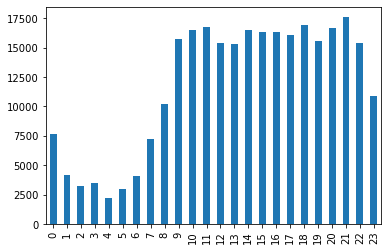

In [41]:
Legit_Hour_Count['Count'].plot(kind = 'bar')
plt.show()

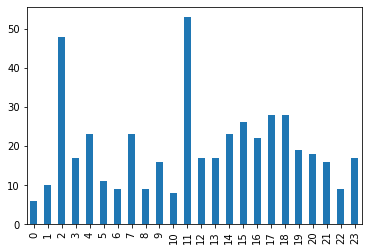

In [42]:
Fraud_Hour_Count['Count'].plot(kind = 'bar')
plt.show()

* Comparing Amount and Transaction Class

In [43]:
Legit_list = CreditData[CreditData['Class']==0]['Amount'].describe().tolist()
Fraud_list = CreditData[CreditData['Class']==1]['Amount'].describe().tolist()

In [44]:
Legit_list 

[283253.0,
 88.20465922685266,
 239.0677147073397,
 0.0,
 5.67,
 22.0,
 77.46,
 8000.0]

In [45]:
Fraud_list 

[473.0,
 123.87186046511626,
 260.21104064437077,
 0.0,
 1.0,
 9.82,
 105.89,
 2125.87]

In [46]:
pd.DataFrame(np.transpose(Legit_list) , np.transpose(Fraud_list))

,0
473.000000,283253.000000
123.871860,88.204659
260.211041,239.067715
0.000000,0.000000
1.000000,5.670000
9.820000,22.000000
105.890000,77.460000
2125.870000,8000.000000


In [47]:
Comparison_DF = pd.DataFrame([CreditData[CreditData['Class']==0]['Amount'].describe().to_dict() , CreditData[CreditData['Class']==1]['Amount'].describe().to_dict()])
Comparison_DF = Comparison_DF.T
Comparison_DF.columns = ['Legit','Fraud']
Comparison_DF

,Legit,Fraud
count,283253.000000,473.000000
mean,88.204659,123.871860
std,239.067715,260.211041
min,0.000000,0.000000
25%,5.670000,1.000000
50%,22.000000,9.820000
75%,77.460000,105.890000
max,8000.000000,2125.870000





* 3. Bar Plot On Class Count - Class Column

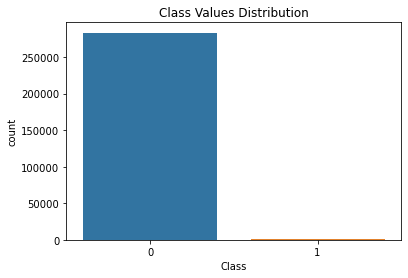

In [48]:
plt.figsize = (20,20)
sns.countplot(CreditData['Class']) # Highly Skewed , Imbalanced Data
plt.title('Class Values Distribution')
plt.show()

##### Figure shows the dataset is highly skewed and imbalanced 

* 4. Pie Chart For Class Imbalance

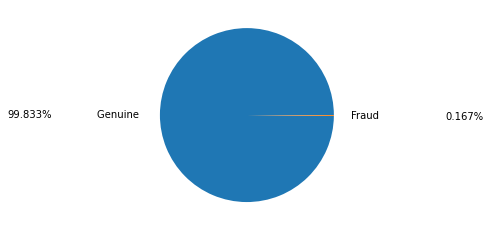

In [49]:
labels = ['Genuine ','Fraud ']
plt.pie(CreditData['Class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)
plt.show()

* 5. Histogram Of All Columns In The Dataset

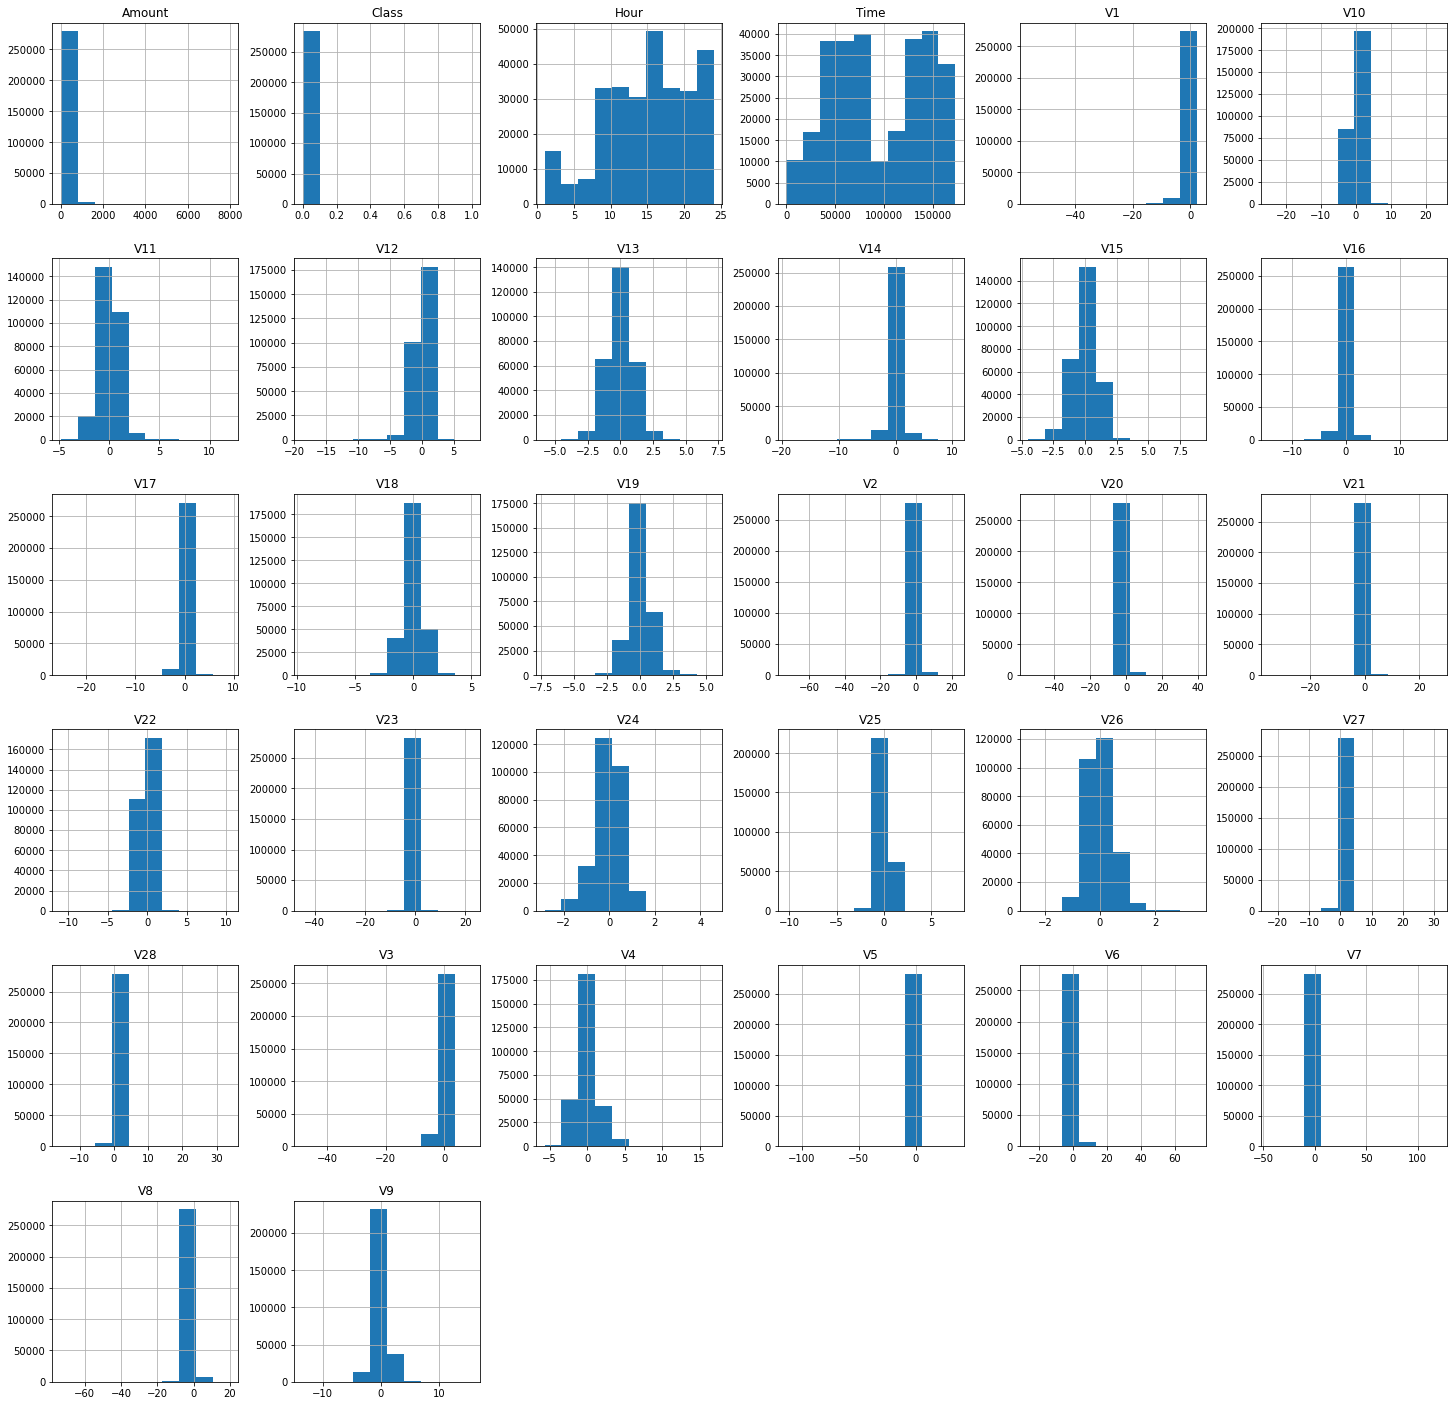

In [50]:
CreditData.hist(figsize = (25,25))
plt.show() 

 * Correlation Between The Columns

In [51]:
CreditData.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.011272,-0.012359,0.415304
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.227274,-0.094486,-0.004949
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.535374,0.084624,0.007929
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.207069,-0.182322,-0.022645
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.095697,0.129326,-0.035251
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.376595,-0.087812,-0.035817
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.208964,-0.043915,-0.019417
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.383107,-0.172347,-0.010502
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.101287,0.033068,0.032706
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044604,-0.094021,-0.191132


* 6. Correlation Plot - Heat Map

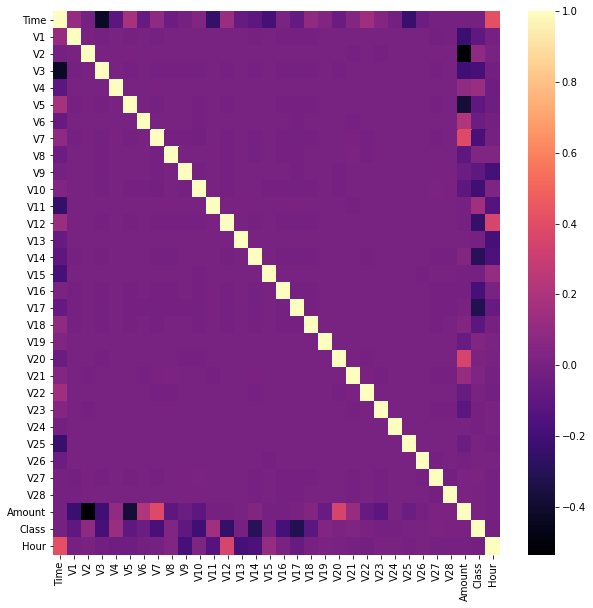

In [52]:
corr_matrix = CreditData.corr()
plot = plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, cmap = 'magma' ) 
plt.show()

* 7. Box Plot On All Columns - Used For Outliers Analysis

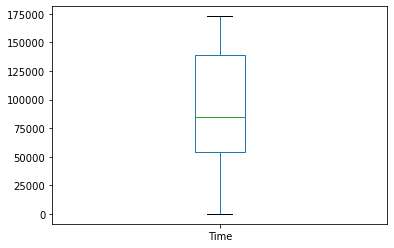

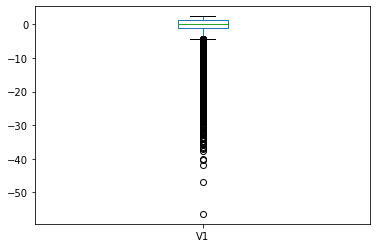

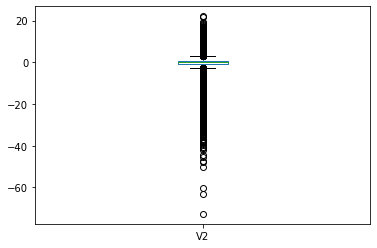

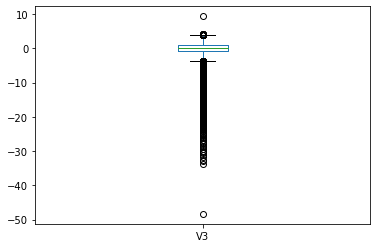

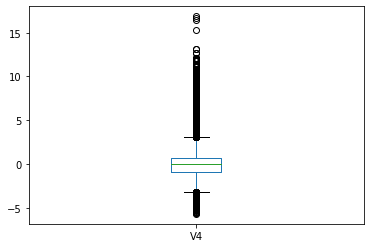

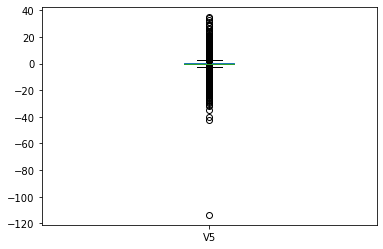

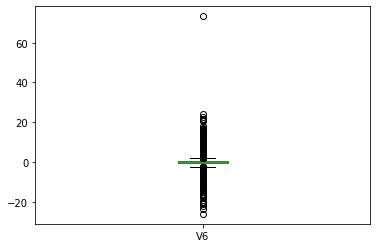

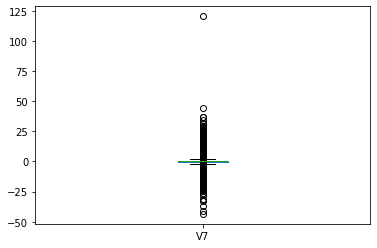

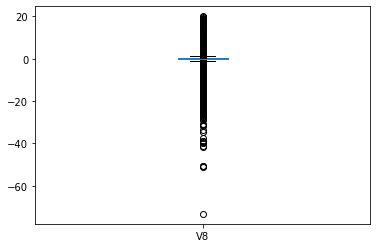

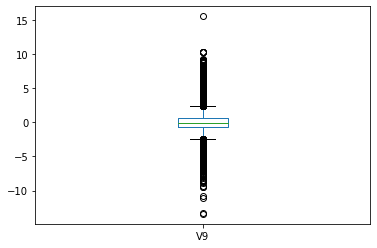

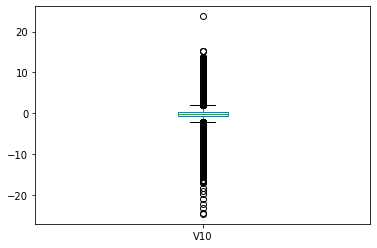

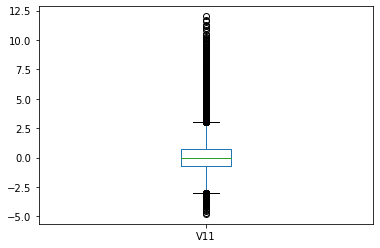

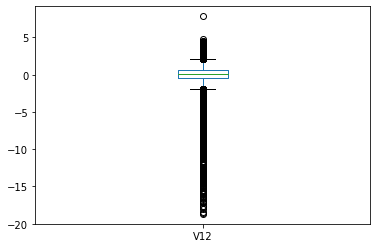

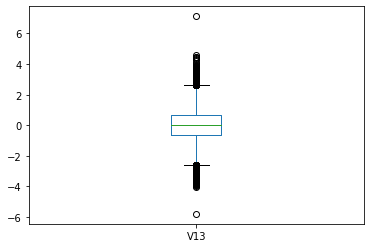

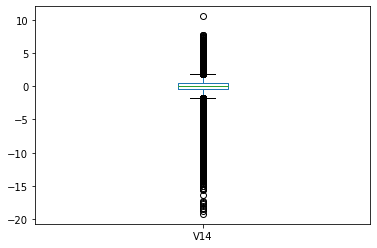

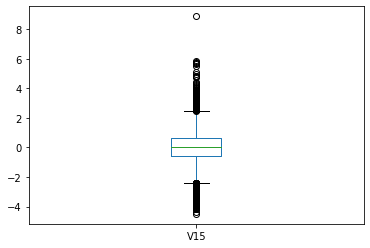

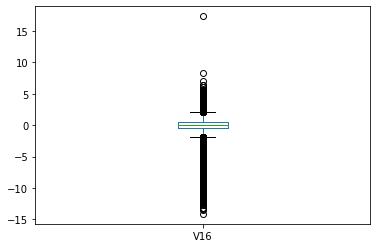

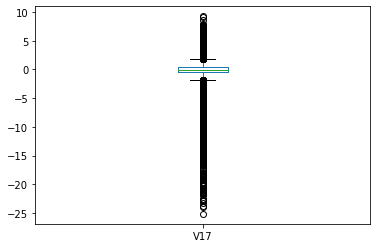

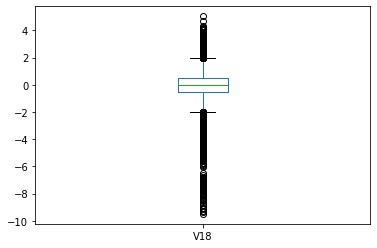

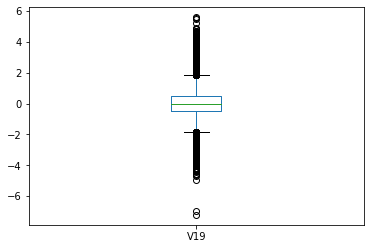

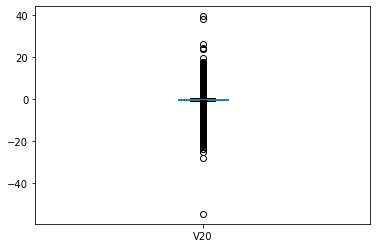

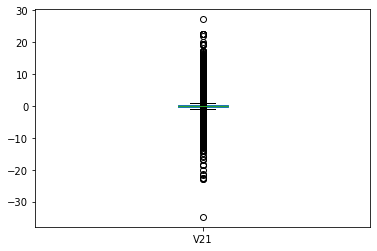

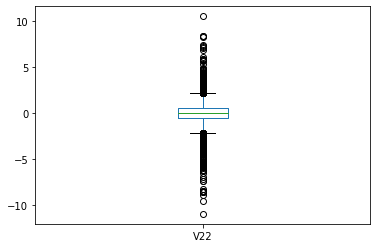

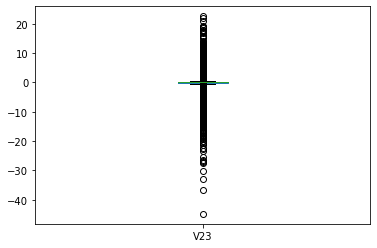

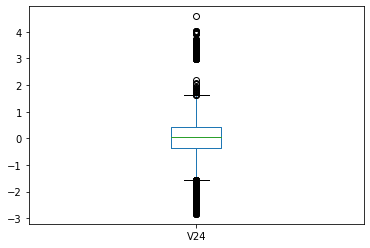

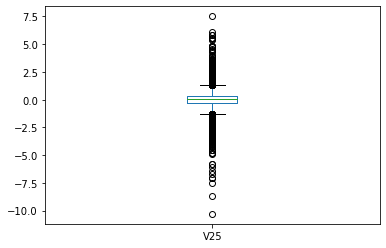

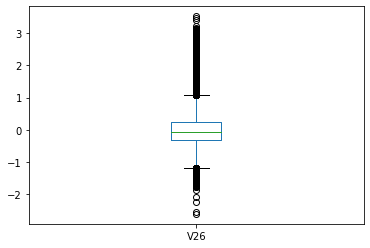

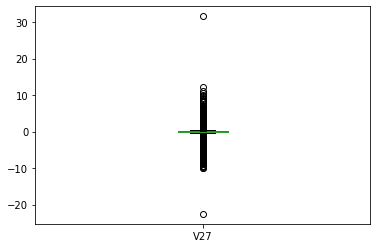

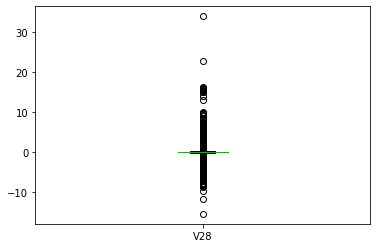

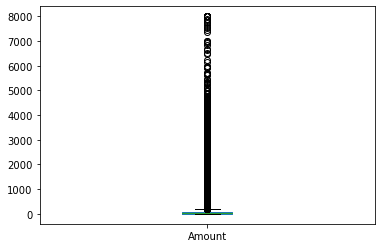

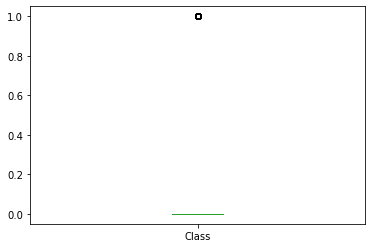

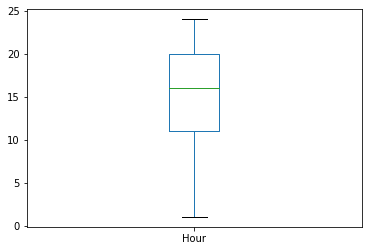

In [53]:
for col in CreditData.columns:
    plt.figure()
    CreditData[col].plot(kind = 'box')

### Feature Transformation & Pre Processing Data

* Handling Time Column

In [54]:
CreditData['Hour'] = CreditData['Time']/(60*60)%24   # 2 days of data
import math
CreditData['Hour'] = CreditData['Hour'].apply(lambda x : math.floor(x))
CreditData.reset_index(drop = True, inplace = True)
CreditData['Hour'].describe()

count    283726.000000
mean         14.045646
std           5.834817
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64

In [55]:
CreditData['Hour'] = CreditData['Hour'].astype(int)+1

In [56]:
CreditData['Hour'].describe()

count    283726.000000
mean         15.045646
std           5.834817
min           1.000000
25%          11.000000
50%          16.000000
75%          20.000000
max          24.000000
Name: Hour, dtype: float64

In [57]:
CreditData[['Amount','Hour','Class']].groupby(['Hour','Class']).mean()

Amount
Hour Class            
1    0       60.401362
     1      303.345000
2    0       62.612368
     1      127.932000
3    0       66.945641
     1       78.190833
4    0       51.947772
     1       13.759412
5    0       77.260541
     1       67.313043
6    0       50.413685
     1      128.788182
7    0       65.083241
     1      111.924444
8    0       67.719176
     1      119.903478
9    0       88.929820
     1       47.887778
10   0      102.718505
     1       78.463125
11   0      109.559501
     1      293.701250
12   0      109.657626
     1      123.976038
13   0      105.698083
     1      200.384706
14   0       98.179265
     1      129.087059
15   0      103.517626
     1      158.309565
16   0      102.266050
     1       85.926538
17   0      103.347549
     1      204.793182
18   0       98.327206
     1      120.425357
19   0       77.211604
     1      226.433571
20   0       77.789136
     1      111.296316
21   0       74.710770
     1       83.911667
22   0       71.908453
     1       64.343750
23   0       68.790288
     1      160.222222
24   0       68.782151
     1      139.879412

* Scalling the Amount Column

In [58]:
from sklearn.preprocessing import StandardScaler 
SS = StandardScaler() 

In [59]:
CreditData['Amount_Scaled'] = SS.fit_transform(CreditData['Amount'].values.reshape(-1,1))

In [60]:
CreditData['Amount_Scaled']

0         0.256603
1        -0.357889
2         1.214497
3         0.147364
4        -0.076426
            ...   
283721   -0.365919
283722   -0.265462
283723   -0.085251
283724   -0.327317
283725    0.538400
Name: Amount_Scaled, Length: 283726, dtype: float64

In [61]:
CreditData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0.256603
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,-0.357889
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,1.214497
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0.147364
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,-0.076426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,24,-0.365919
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,24,-0.265462
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,24,-0.085251
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,24,-0.327317


### Visualization After Feature Engineering

 * Let's explore the Amount by before and after transformation


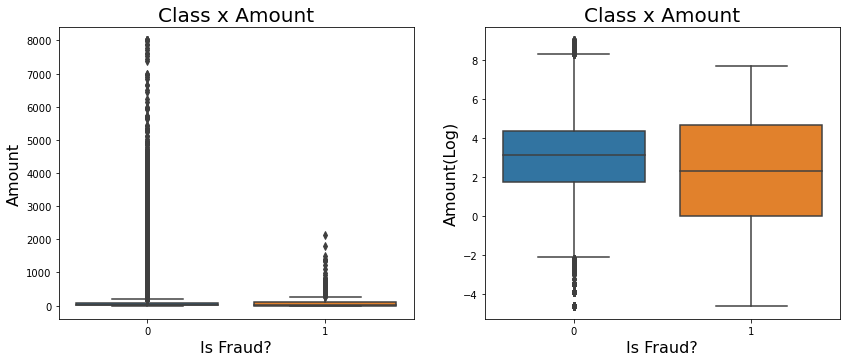

In [62]:

CreditData['Amount_log'] = np.log(CreditData.Amount + 0.01)

plt.figure(figsize=(14,6))

plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=CreditData)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=CreditData)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()


 ### __Class Imbalance Handling__

- Under Sampling
- Over Sampling
- SMOTE


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [64]:
ProcessedData = CreditData.drop(columns =['Hour','Time','Amount','Amount_log'])

In [65]:
ProcessedData 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.256603
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.357889
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.214497
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.147364
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.076426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.365919
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.265462
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.085251
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.327317


In [66]:
X = ProcessedData.drop(['Class'],1)

In [67]:
y = ProcessedData['Class']

In [68]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.256603
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357889
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.214497
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.147364
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.076426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.365919
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.265462
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.085251
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.327317


In [69]:
y

0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64

# Modelling

## 1. Logistic Regression

### Splitting The Data X_train, y_train, X_test, y_test

In [70]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [73]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred , y_test))

0.999177612255927


In [74]:
pd.Series(y_pred).value_counts()

0    85035
1       83
dtype: int64

In [75]:
pd.Series(y_test).value_counts()

0    84989
1      129
Name: Class, dtype: int64

In [76]:
83/129

0.6434108527131783

* There is a drop in prediction, which represents class imbalance and further let's check Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[84977,    12],
       [   58,    71]], dtype=int64)

### Ploting Confusion Matrix

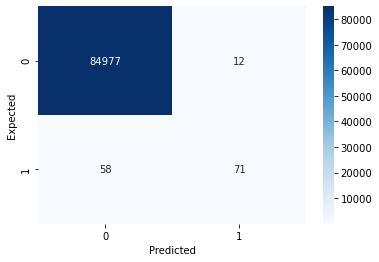

In [78]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Understanding the Confusion Matrix Plot

## __Why and When__ ? - 
### Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.

## Let's get to know the terminology and Structure first - 

A confusion matrix is defined into four parts : __{ TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted)__
Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative <br>
__P__ redicted - __R__ ows and __A__ ctual as __C__ olumns <br>


## __Accuracy , Precision and Recall__


#### __Accuracy__ - > The most used and classic classification metric : Suited for binary classification problems.

Accuracy = ( TP + TN ) / (TP + TN + FP + FN )

Basically Rightly predicted results amongst all the results , used when the classes are balanced

#### __Precision__ - > What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !

Precision = ( TP ) / ( TP + FP )

#### __Recall__ - > What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible

Recall = TP / ( TP + FN )

#### __F1 Score__

## Harmonic mean of Precision and Recall 

### F1 = 2*(precision * recall) / (precision + recall )

It basically maintains a balance between the precision and recall for your classifier

## __ROC_AUC Curve__ 

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class. 

Let's talk about some definitions first: 

#### __Sensitivity__ 

The sensitivity of a model is defined by the proportion of actual positives that are classified as Psitives , i.e = TP / ( TP + FN )


#### __Specificity__

The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )

As we can see that both are independent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

## __ROC CURVE__

It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. 
It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class


In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred) 

0.7751232010781879

In [80]:
y_pred_proba = logreg.predict_proba(X_test)

In [81]:
y_pred_proba

array([[9.99877920e-01, 1.22079794e-04],
       [9.99989908e-01, 1.00919188e-05],
       [9.99931568e-01, 6.84323497e-05],
       ...,
       [9.99903985e-01, 9.60150320e-05],
       [9.98896910e-01, 1.10308953e-03],
       [9.99945666e-01, 5.43343792e-05]])

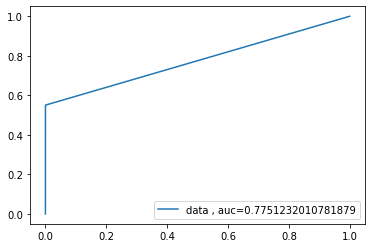

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fixing Class Imbalance Using Sampling Techniques

In [83]:
# the imblearn library
!pip install imblearn

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

 ## __X and y Split__ 

 1. Under sampled - X_test,  y_test , X_train , y_train -> 4-5 different models
 2. Over sampled 
 3. SMOTE
 4. ADASYN


# Classifier 1 - Logistic Regression Classifier 

 ### __1. Under Sampled__ 

In [85]:
from collections import Counter 

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  

0.9401408450704225


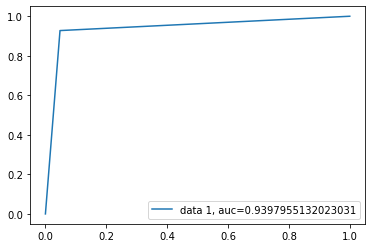

In [88]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 ### __2. Over Sampled__

In [89]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
print('Original dataset shape %s' % Counter(y))
random_state = 42

ros = RandomOverSampler(random_state=random_state)

X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  


0.9483324703445679


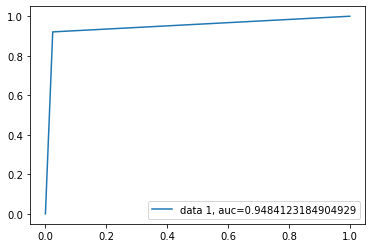

In [93]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 ### __3. SMOTE Sampled__

In [94]:
from imblearn.over_sampling import SMOTE, ADASYN

In [95]:
print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  

0.9444843249858784


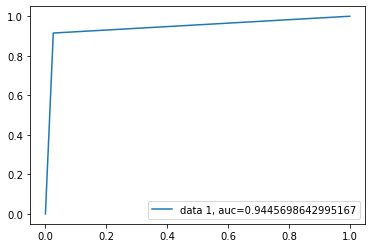

In [98]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


### __4. ADASYN Sampled__

In [99]:
print('Original dataset shape %s' % Counter(y))

rus = ADASYN(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({1: 283301, 0: 283253})


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [101]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test)) 

0.8870368953973419


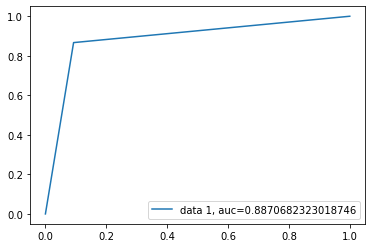

In [102]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## __Making Different Datasets__

### Undersampled Data

In [103]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 473, 1: 473})


### Oversampled Data

In [104]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283253, 1: 283253})


### SMOTE Data

In [105]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283253, 1: 283253})


## __Applying Different Models And Evaluating The Dataset__

In [106]:
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classifier 2 - Decision Tree Classifier 

### Raw Data

0.9992128574449588


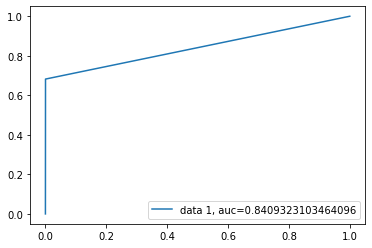

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )


y_pred = dte.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

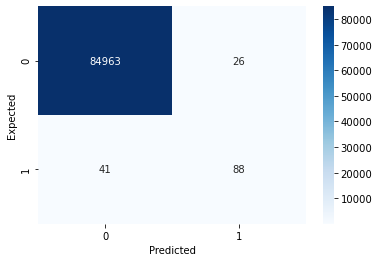

In [114]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Undersampled data with Decision Tree Classifiers

0.8838028169014085


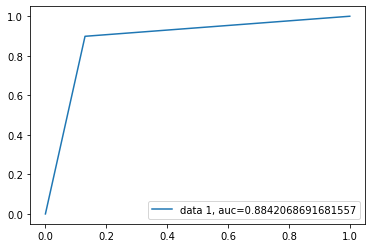

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

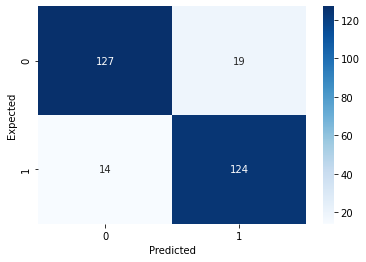

In [116]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Oversampled data with Decision Tree Classifiers

0.9995998870269253


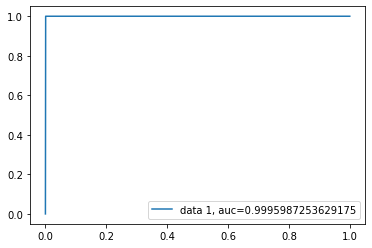

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

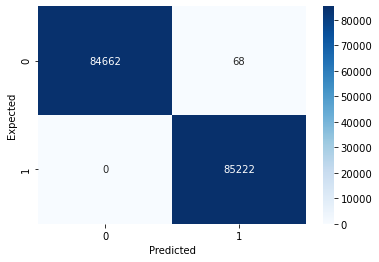

In [118]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


### SMOTE data with Decision Tree Classifiers

0.9980994633778949


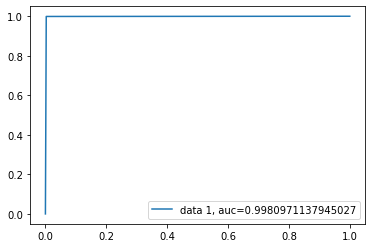

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

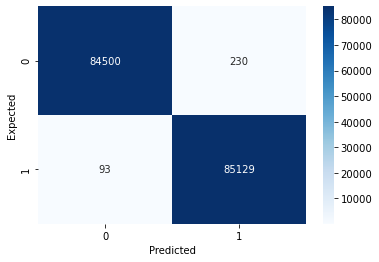

In [120]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier - 3 Random Forest Classifier

### Raw Data

0.9995770577316196


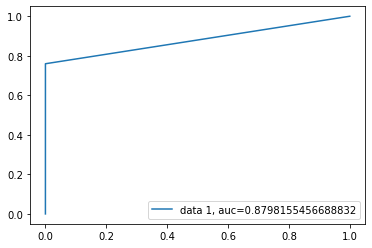

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

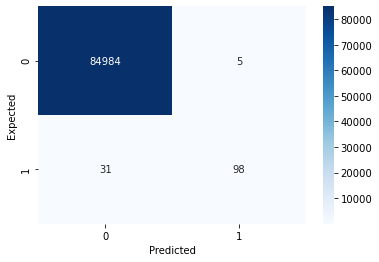

In [122]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Undersampled data with Random Forest Classifiers

0.9366197183098591


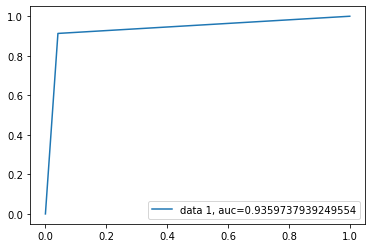

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

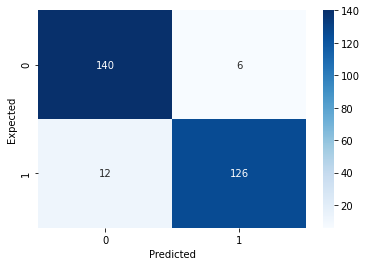

In [124]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Oversampled data with Random Forest Classifiers

0.9999176237996611


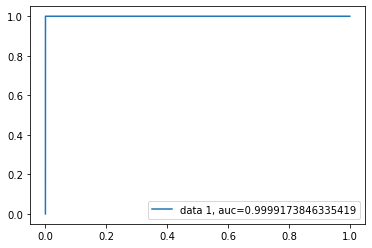

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

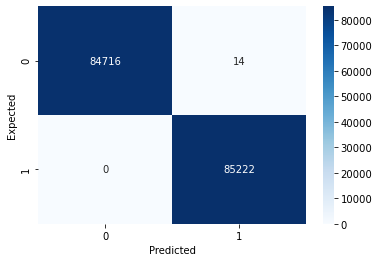

In [126]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### SMOTE data with Random Forest Classifiers

0.9998411316136321


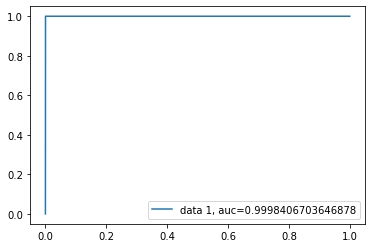

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

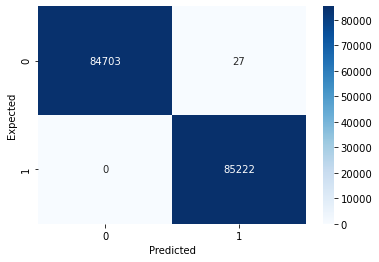

In [128]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier 4 - Support Vector Machine Classifier

### Raw Data

0.999424328579149


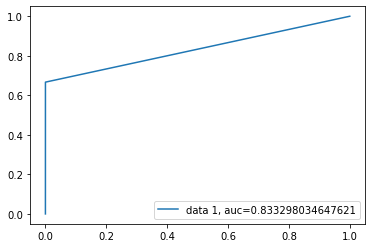

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


sv = SVC(probability = True)
sv.fit( X_train, y_train )


y_pred = sv.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

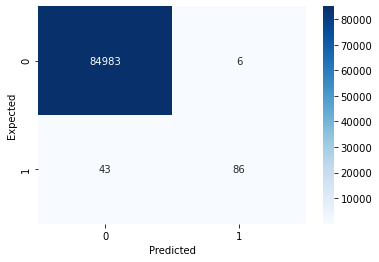

In [116]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Undersampled data with Support Vector Machine Classifiers

0.9366197183098591


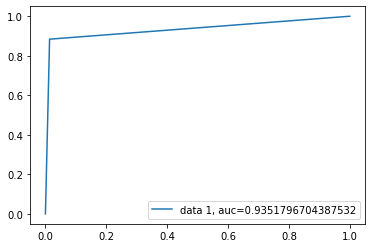

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)


sv = SVC(probability = True)
sv.fit( X_train, y_train )


y_pred = sv.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

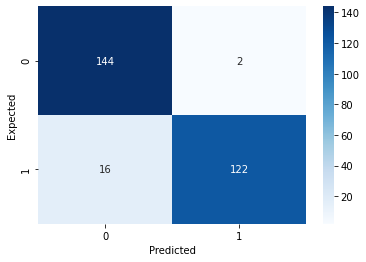

In [118]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Oversampled data with Support Vector Machine Classifiers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)


sv = SVC(probability = True)
sv.fit( X_train, y_train )


y_pred = sv.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### SMOTE data with Support Vector Machine Classifiers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)


sv = SVC(probability = True)
sv.fit( X_train, y_train )


y_pred = sv.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier 5 - Gradient Boost Classifier

### Raw Data

0.9986841796094833


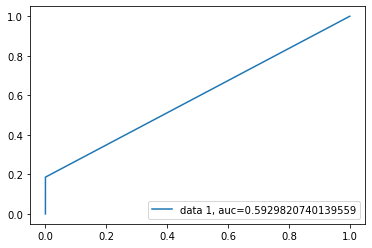

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


GB = GradientBoostingClassifier()
GB.fit( X_train, y_train )


y_pred = GB.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

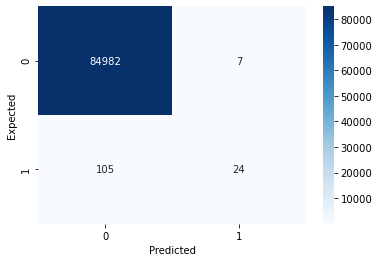

In [141]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Undersampled data with Gradient Boost Classifiers

0.9330985915492958


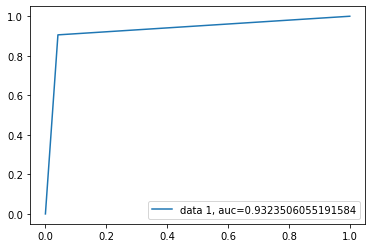

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)


GB = GradientBoostingClassifier()
GB.fit( X_train, y_train )


y_pred = GB.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

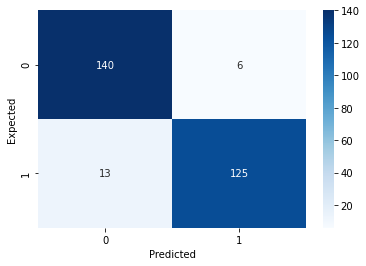

In [143]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Oversampled data with Gradient Boost Classifiers

0.9924978817548484


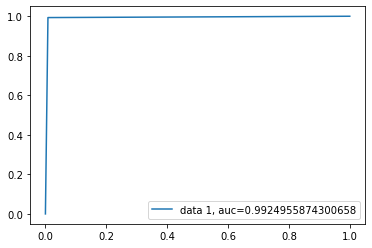

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)


GB = GradientBoostingClassifier()
GB.fit( X_train, y_train )


y_pred = GB.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

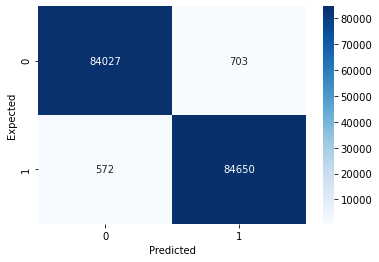

In [145]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### SMOTE data with Gradient Boost Classifiers

0.9762756543023913


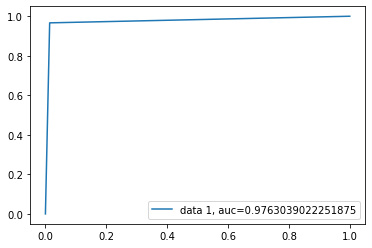

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)


GB = GradientBoostingClassifier()
GB.fit( X_train, y_train )


y_pred = GB.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

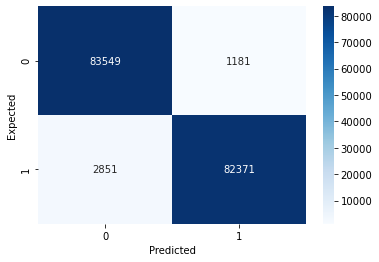

In [147]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# GridSearchCV For Best Parameter Among The Top Model

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_params = {'n_estimators':[100,200] , 'criterion':['gini','entropy']}
grid_knears = GridSearchCV(RandomForestClassifier(), rfc_params) 
grid_knears.fit(X_train, y_train)

In [ ]:
grid_knears.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100 , criterion= 'entropy')
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()